# Density ratios at the Weddell Sea mooring

Rowan Brown, August 2025

Buoyancy frequency, in its most basic form, is $$ N^2 = -\frac{g}{\rho} \frac{d \rho}{d z}. $$

Recall, we can define density by $$ R(S,\theta,p) = \rho_0 - \rho_0 \alpha \left( \theta - \theta_r \right) + \rho_0 \beta \left(S - S_r \right) + \textrm{pressure term},$$

where the expansion coefficients $\alpha$ and $\beta$ account for changes in density due to changes in temperature and salinity (I believe the pressure term counterpart is effectively constant with $p$), i.e., $$ \alpha = \frac{1}{\rho} \frac{\partial R}{\partial \theta}, \quad \beta = - \frac{1}{\rho} \frac{\partial R}{\partial S}. $$

We can rearrange then the buoyancy frequency in terms of $\alpha$ and $\beta$, i.e., 
$$\begin{align}
    \frac{N^2}{g} &= -\frac{1}{\rho} \left( \frac{d R}{d z} \right) \\
                  &= -\frac{1}{\rho} \left( \frac{\partial R}{\partial \theta}\frac{\partial \theta}{\partial z} + \frac{\partial R}{\partial S}\frac{\partial S}{\partial z} + \frac{\partial R}{\partial p}\frac{\partial p}{\partial z} \right) \\
                  &= -\frac{1}{\rho} \left( \frac{\partial R}{\partial \theta}\frac{\partial \theta}{\partial z} + \frac{\partial R}{\partial S}\frac{\partial S}{\partial z} - \rho g \frac{\partial R}{\partial p} \right) \\
                  &= -\frac{1}{\rho} \frac{\partial R}{\partial \theta}\frac{\partial \theta}{\partial z} -\frac{1}{\rho} \frac{\partial R}{\partial S}\frac{\partial S}{\partial z} + g \frac{\partial R}{\partial p}\\
                  &= \alpha \frac{\partial \theta}{\partial z} + \beta \frac{\partial S}{\partial z} + g \frac{\partial R}{\partial p}.\\
\end{align}$$

We can now consider the buoyancy contributions of the temperature and salinity gradients. See Ruddick and Gargett (2003) and van Haren and Millot (2006) for more.

##### Case 1: Diffusive convection 

Consider a stable water column where salinity and temperature both *increase* with depth, i.e., cold and fresh over warm and salty,
$$\begin{align}
    \frac{\partial S}{\partial z} > 0 &\Rightarrow \textrm{stabilising}, \\
    \frac{\partial \theta}{\partial z} > 0 &\Rightarrow \textrm{destabilising}. 
\end{align}$$ 

In this case, because heat diffuses faster than salt, there is a net downward flux of density (i.e., up-gradient) due to the buoyancy effects of upward heat diffusion outweighing those of upward salt diffusion. This can drive convection in well-mixed layers. Often this results in staircases, where vertical fluxes are enhanced by (a) diffusion driving interfacial fluxes and (b) convection carrying the fluxes from one step to the next. Ruddick and Gargett (2003) note that diffusive convection processes may change in the future since they are strong functions of the **density ratio**, $R_{\rho}=\alpha \theta_z / \beta S_z $. (Maybe consider how the Weddell Sea might be changing and how this could play a role?)

##### Case 2: Salt fingering

Now consider a stable water column where both salinity and temperature *decrease* with depth, i.e., warm and salty over cold and fresh, 
$$\begin{align}
    \frac{\partial S}{\partial z} < 0 &\Rightarrow \textrm{destabilising}, \\
    \frac{\partial \theta}{\partial z} < 0 &\Rightarrow \textrm{stabilising}. 
\end{align}$$ 

Imagine you displace a warm and salty water parcel downward; it is lighter than the water around it, but also warmer and saltier, hence heat diffuses outward and the parcel cools. It is now colder and while holding almost the same amount of salt, meaning it can sink downward and the process can continue. This also works in reverse for cold and fresh water displaced upwards, which can become warmer and hence lighter.

As in the case of diffusive convection, the result is a net downward flux of density due to the strong downward salt flux outweighing the weaker downward heat flux (i.e., a downard-moving parcel's salt continues to sink but its heat is diffused sideways). As with the diffusive convection case, we can consider the **density ratio**, $R_{\rho}=\alpha \theta_z / \beta S_z $. 

##### Additional cases

As near as I can tell, the additional cases are either (1) both the salinity and temperature gradients increase with depth (fresh and warm over salty and cold), which leads to a boring and stable water column, or (2) both the salinity and temperature gradients decrease with depth (cold and salty over warm and fresh), which leads to active convection. 

## The Weddell Sea mooring

I will consider the density ratio,
$$\begin{align}
    R_{\rho} &= \alpha \theta_z / \beta S_z\\
             &= \frac{ \alpha \frac{\partial \theta}{\partial z} }{ \beta \frac{\partial S}{\partial z} }\\
             &= \frac{ \frac{1}{\rho} \frac{\partial R}{\partial \theta} \frac{\partial \theta}{\partial z} }{ - \frac{1}{\rho} \frac{\partial R}{\partial S} \frac{\partial S}{\partial z} },\\
\end{align}$$
which can be calculated numerically. This will tell me which term is more important in my case and *maybe* explain the stratification and downward mixing process that we see in the time series. And, if not, it becomes a sort of minimisation problem relating to non-linear effects from wind mixing or a front. (At some point, though, you'll also definitely want to revisit all of the mooring processing scripts and the correcting methods that you used.)

In [1]:
import matplotlib.pyplot as plt
import mooring_analyses as ma
import xarray as xr 
import numpy as np 
import gsw 

Note to self: You're basically plotting something about the heat vs salinity terms in N2. VERY DEPENDANT ON THINGS LIKE P_ref and data calibration, so play around with these and see what you come up with. Also consider if we're within error bars.

In [65]:
# Open the data
ds = ma.open_mooring_data().convert_to_daily()
ds.append_gsw_vars()
ds = ds.sel(depth=[-50,-125,-220])

Beginning to open the mooring data
Mooring data opened
Resampling to daily
Done resampling to daily
Adding GSW variables to the mooring time series
GSW variables added to the mooring time series


In [135]:
# Calculate N2
N2, pmid = [], []
for n,t in enumerate(ds['time']):
    tmp1, tmp2 = gsw.Nsquared(
        ds['SA'].isel(time=n),
        ds['CT'].isel(time=n),
        ds['p_from_z'],
        lat=-69.0005
    )
    N2.append(tmp1)
    pmid.append(tmp2)

depth_mid = [(-50-125)/2,(-125-220)/2]

ds = ds.assign(
    N2=(['time','depth_mid'], [i for i in N2]),
    depth_mid=(depth_mid),
    pmid=(('depth_mid'),pmid[0])
)

Note to future rowan: really check this stuff, because I'm incredibly tired

In [136]:
# Calculate SA and CT at mid depths
# Note pmid, where we have N2, is halfway between the sensors, hence interp
ds = ds.assign(
    SA_mid=(
        ['time','depth_mid'], ds['SA'].interp(depth=depth_mid).values
    ),
    CT_mid=(
        ['time','depth_mid'], ds['CT'].interp(depth=depth_mid).values
    )
)

# Calculate alpha, beta
ds['alpha'] = gsw.alpha(ds['SA_mid'],ds['CT_mid'],ds['pmid'])
ds['beta'] = gsw.beta(ds['SA_mid'],ds['CT_mid'],ds['pmid'])

# Calculate gradients
# Multiply by -1 because the depth diff method yields negatives
# i.e., water is cold over warm -> dCT/dz should be positive
# and water is fresh over salt -> dSA/dz should be positive
ds = ds.assign(
    dCTdz=(
        ['time','depth_mid'],
        ((-1)*ds['CT'].diff('depth')/ds['depth'].diff('depth')).values
    ), 
    dSAdz=(
        ['time','depth_mid'], 
        ((-1)*ds['SA'].diff('depth')/ds['depth'].diff('depth')).values
    )
)

# Calculate density ratio
ds['numerator'] = ds['alpha']*ds['dCTdz']
ds['denominator'] = ds['beta']*ds['dSAdz']
ds['density_ratio'] = ds['numerator']/ds['denominator']

In [137]:
ds

<xarray.mooring_ds> Size: 126kB
Dimensions:        (depth: 3, time: 366, depth_mid: 2)
Coordinates:
  * depth          (depth) int64 24B -50 -125 -220
  * time           (time) datetime64[ns] 3kB 2021-04-01 ... 2022-04-01
  * depth_mid      (depth_mid) float64 16B -87.5 -172.5
    pmid           (depth_mid) float64 16B 88.41 174.3
Data variables: (12/19)
    T              (time, depth) float64 9kB -1.455 -0.1832 ... 0.3409 0.6499
    S              (time, depth) float64 9kB 34.09 34.61 34.65 ... 34.66 34.65
    P              (time, depth) float64 9kB 50.23 125.8 nan ... 49.42 125.5 nan
    p_from_z       (depth) float64 24B 50.51 126.3 222.4
    SA             (time, depth) float64 9kB 34.25 34.78 34.83 ... 34.83 34.82
    CT             (time, depth) float64 9kB -1.453 -0.1857 ... 0.3372 0.6414
    ...             ...
    beta           (time, depth_mid) float64 6kB 0.0007825 ... 0.0007773
    dCTdz          (time, depth_mid) float64 6kB 0.01689 0.008673 ... 0.003202
    dSAdz          (time, depth_mid) float64 6kB 0.006996 ... -0.0001105
    numerator      (time, depth_mid) float64 6kB 7.233e-07 ... 2.028e-07
    denominator    (time, depth_mid) float64 6kB 5.474e-06 ... -8.592e-08
    density_ratio  (time, depth_mid) float64 6kB 0.1321 1.301 ... 0.2758 -2.361
Attributes:
    description:  Mooring data

(0.0, 5.0)

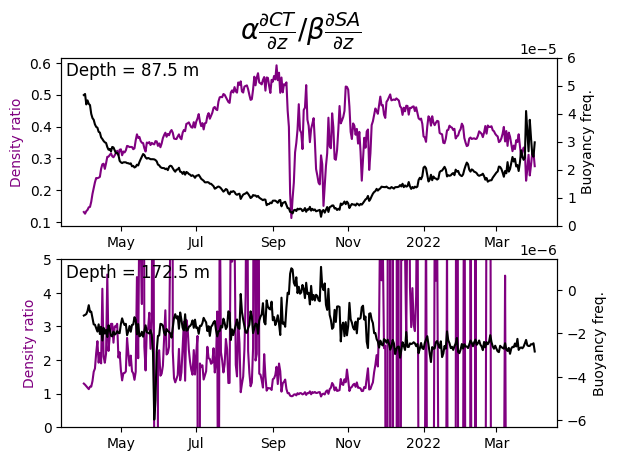

In [176]:
fig, [ax1, ax2] = plt.subplots(ncols=1, nrows=2)

ds['density_ratio'].sel(depth_mid=-87.5).plot(ax=ax1,c='purple')
ds['density_ratio'].sel(depth_mid=-172.5).plot(ax=ax2,c='purple')

ax1b = ax1.twinx()
ax2b = ax2.twinx()
ds['N2'].sel(depth_mid=-87.5).plot(ax=ax1b,c='black')
ds['N2'].sel(depth_mid=-172.5).plot(ax=ax2b,c='black')

plt.suptitle(r"$\alpha \frac{\partial CT}{\partial z}/\beta \frac{\partial SA}{\partial z}$",fontsize=20)
for ax in [ax1, ax1b, ax2, ax2b]:
    ax.set_title('')
    ax.set_ylabel('')
    ax.set_xlabel('')
ax1.set_ylabel("Density ratio")
ax2.set_ylabel("Density ratio")
ax1b.set_ylabel("Buoyancy freq.")
ax2b.set_ylabel("Buoyancy freq.")
t1 = ax1.text(0.01,0.89,"Depth = 87.5 m",transform=ax1.transAxes, fontsize=12)
t2 = ax2.text(0.01,0.89,"Depth = 172.5 m",transform=ax2.transAxes, fontsize=12)
#t1.set_bbox(dict(facecolor='grey', alpha=0.1,linewidth=1))
#t2.set_bbox(dict(facecolor='grey', alpha=0.1,linewidth=1))

ax1.yaxis.label.set_color('purple')
ax2.yaxis.label.set_color('purple')
ax1b.yaxis.label.set_color('black')
ax2b.yaxis.label.set_color('black')

ax1b.set_ylim(0,6e-5)
ax2.set_ylim(0,5)